Ohio is the only state whose name doesn’t share any letters with the word “mackerel.” It’s strange, but it’s true.

But that isn’t the only pairing of a state and a word you can say that about — it’s not even the only fish! Kentucky has “goldfish” to itself, Montana has “jellyfish” and Delaware has “monkfish,” just to name a few.

What is the longest “mackerel?” That is, what is the longest word that doesn’t share any letters with exactly one state? (If multiple “mackerels” are tied for being the longest, can you find them all?)

Extra credit: Which state has the most “mackerels?” That is, which state has the most words for which it is the only state without any letters in common with those words?

(For both the Riddler and the extra credit, please refer to Friend of the Riddler™ Peter Norvig’s [word list](https://norvig.com/ngrams/word.list).)

In [18]:
import pandas as pd
import json
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import matplotlib.ticker as mtick

thou_fmt = mtick.FuncFormatter(lambda x, p: format(int(x), ','))
%matplotlib inline

## 1. Import the lists of words and states

In [4]:
with open('general_data/word.list', 'r') as fh:
    word_list = [line.replace('\n', '') for line in fh]
print("List of {} words, e.g.".format(len(word_list)))
for i in word_list[:5]:
    print(i)

List of 263533 words, e.g.
aa
aah
aahed
aahing
aahs


In [5]:
with open('general_data/US_states.txt', 'r') as fh:
    state_list = [line.replace('\n', '').lower() for line in fh]

## 1a. See how weird the long words are

They're basically all science words, except el clasico "antidisestablishmentarianism".

In [6]:
max_len = max([len(i) for i in word_list])
for i in range(max_len, max_len-20, -1):
    print([word for word in word_list if len(word)==i])

['pneumonoultramicroscopicsilicovolcanoconiosis']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['dichlorodiphenyltrichloroethanes']
['dichlorodiphenyltrichloroethane']
['floccinaucinihilipilifications']
['antidisestablishmentarianisms', 'floccinaucinihilipilification']
['antidisestablishmentarianism', 'ethylenediaminetetraacetates']
['electroencephalographically', 'ethylenediaminetetraacetate']
[]


## 2. Trial an approach to match the provided mackerels

First, a function to turn a word into a set of letters.

In [7]:
test_words = ['mackerel', "goldfish", "jellyfish", "monkfish"]
str2set = lambda string: set([string[i] for i in range(len(string))])
str2set(test_words[0])

{'a', 'c', 'e', 'k', 'l', 'm', 'r'}

Next, compare that set of letters to the set of letters of each state.

In [8]:
for test_word in test_words:
    print([state for state in state_list if str2set(state).isdisjoint(str2set(test_word))])

['ohio']
['kentucky']
['montana']
['delaware']


Enfunction it.

In [9]:
def unmatching_states(string, states=state_list):
    """Checks a string against each of the 50 US states, and returns those with no overlapping letters."""
    return [state for state in states if str2set(state).isdisjoint(str2set(string))]
disjoint_states = lambda string: len(unmatching_states(string)) == 1
print([unmatching_states(i) for i in test_words])
print(disjoint_states('jellyfish'), disjoint_states('trial'))

[['ohio'], ['kentucky'], ['montana'], ['delaware']]
True False


In [10]:
word_list.sort(key=len, reverse=True)
word_list[:10]

['pneumonoultramicroscopicsilicovolcanoconiosis',
 'dichlorodiphenyltrichloroethanes',
 'dichlorodiphenyltrichloroethane',
 'floccinaucinihilipilifications',
 'antidisestablishmentarianisms',
 'floccinaucinihilipilification',
 'antidisestablishmentarianism',
 'ethylenediaminetetraacetates',
 'electroencephalographically',
 'ethylenediaminetetraacetate']

Trial it on a subset of the word list that we know includes mackerels -- the eight letter words.

In [12]:
eight_words = [word for word in word_list if len(word)==8]
print(eight_words[:10], '\n', len(eight_words))

['aardvark', 'aardwolf', 'aasvogel', 'abactors', 'abacuses', 'abalones', 'abampere', 'abanding', 'abandons', 'abapical'] 
 39226


In [15]:
state_mackerels_eight = {state: {'words': []} for state in state_list}
for word in eight_words:
    _ = unmatching_states(word)
    if len(_)==1:
        matching_state = _[0]
        state_mackerels_eight[matching_state]['words'].append(word)
state_mackerels_eight['new mexico']['words']

['ashtrays',
 'bulghars',
 'draughts',
 'fraughts',
 'lathyrus',
 'straught',
 'subgraph']

## 3. Get all the mackerels from the word list

In [16]:
state_mackerels = {state: {'words': []} for state in state_list}
for word in word_list:
    _ = unmatching_states(word)
    if len(_)==1:
        matching_state = _[0]
        state_mackerels[matching_state]['words'].append(word)

In [17]:
for state in state_mackerels.keys():
    print(state, state_mackerels[state]['words'][:5])

alabama ['counterproductivenesses', 'counterproductiveness', 'unconscientiousnesses', 'counterconditionings', 'deoxycorticosterones']
alaska ['microreproduction', 'immunocompetence', 'immunodeficiency', 'microenvironment', 'oophorectomizing']
arizona []
arkansas []
california []
colorado ['intempestivities', 'submissivenesses', 'extinguishments', 'extinguishment', 'imminentnesses']
connecticut ['hamadryads', 'hallmarks', 'hamadryas', 'hashmarks', 'sawsharks']
delaware ['photocompositions', 'monophthongising', 'photocomposition', 'nonconsumptions', 'misfunctioning']
florida []
georgia []
hawaii ['overscrupulousnesses', 'contemptuousnesses', 'counterdeployments', 'countergovernments', 'obstreperousnesses']
idaho []
illinois ['charterparty', 'hypercharged', 'jackhammered', 'tachygrapher', 'chamaephyte']
indiana ['spectrophotometers', 'heterochromosomes', 'spectrophotometer', 'spectrophotometry', 'heterochromosome']
iowa ['speechlessnesses', 'uncheerfulnesses', 'untruthfulnesses', 'cheerle

In [19]:
with open('2020-05-20_state-mackerels.json', 'w') as fp:
    json.dump(state_mackerels, fp)

## 4. Visualise

In [24]:
def get_mackerel_counts(reference_list, reference_dict):
    # Make a df of the counts
    mackerel_counts = pd.DataFrame(index=reference_list, columns=['count'])
    for unit in reference_list:
        reference_dict[unit]['len'] = len(reference_dict[unit]['words'])
        mackerel_counts.loc[unit, 'count'] = reference_dict[unit]['len']
    mackerel_counts.sort_values(by='count', inplace=True)
    # Add in normed measures
    max_len = max([len(unit) for unit in reference_list])
    max_let = max([len(str2set(unit)) for unit in reference_list])
    for unit in mackerel_counts.index:
        mackerel_counts.loc[unit, 'len_norm'] = mackerel_counts.loc[unit, 'count'] * len(unit) / max_len
        mackerel_counts.loc[unit, 'letter_norm'] = mackerel_counts.loc[unit, 'count'] * len(str2set(unit)) / max_let
    return mackerel_counts

state_mackerel_counts = get_mackerel_counts(state_list, state_mackerels)
state_mackerel_counts.tail()

,count,len_norm,letter_norm
hawaii,1763,755.571429,587.666667
mississippi,4863,3820.928571,1621.000000
utah,6619,1891.142857,2206.333333
alabama,8274,4137.000000,2758.000000
ohio,11342,3240.571429,2835.500000


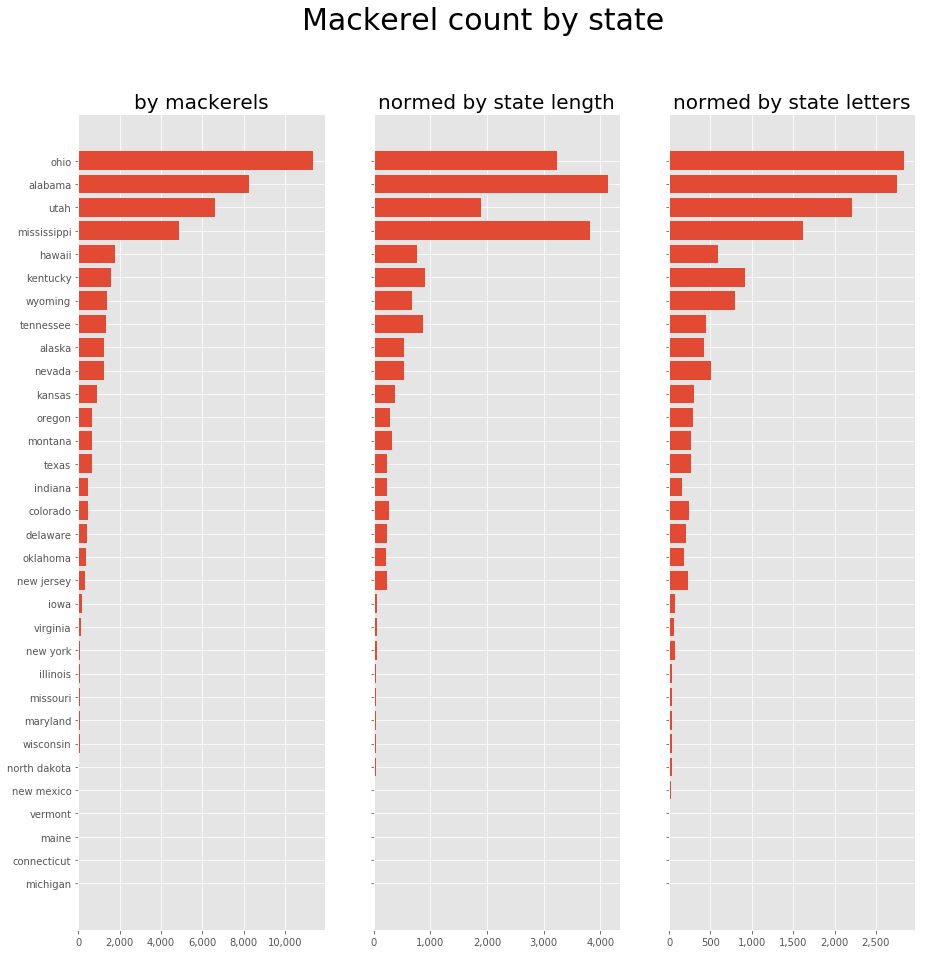

In [27]:
def plot_mackerel_counts(reference_df, unit_string):
    # Plot
    mackerel_counts_nonzero = reference_df[reference_df['count'] > 0]
    fig, axs = plt.subplots(1, 3, figsize=(15, 15), sharey=True)
    cols = ['count', 'len_norm', 'letter_norm']
    titles = ['by mackerels', 'normed by {} length'.format(unit_string), 'normed by {} letters'.format(unit_string)]
    for (ax, col, title) in zip(axs, cols, titles):
        ax.barh(mackerel_counts_nonzero.index, mackerel_counts_nonzero[col])
        ax.set_title(title, fontsize=20)
        ax.xaxis.set_major_formatter(thou_fmt)
    plt.suptitle('Mackerel count by {}'.format(unit_string), fontsize=30)
    plt.savefig('2020-05-20_Mackerel-count_{}.png'.format(unit_string))

plot_mackerel_counts(state_mackerel_counts, "state")

In [39]:
def get_longest_mackerel(reference_dict):
    max_lens = set([])
    for unit in reference_dict.keys():
        reference_dict[unit]['lens'] = [len(word) for word in reference_dict[unit]['words']]
        unique_lens = set(reference_dict[unit]['lens'])
        max_lens = max_lens.union(unique_lens)
    max_len = max(max_lens)
    longest_mackerels = pd.DataFrame(index=state_mackerels.keys(), columns=['word', 'max_len'])
    for unit in reference_dict.keys():
        for (word, length) in zip(reference_dict[unit]['words'], reference_dict[unit]['lens']):
            if length == max_len:
                longest_mackerels.loc[unit] = [word, length]
    longest_mackerels.dropna(inplace=True)
    return longest_mackerels

get_longest_mackerel(state_mackerels)

,word,max_len
alabama,counterproductivenesses,23
mississippi,hydrochlorofluorocarbon,23


## 5. Do the same for English counties

In [93]:
# From the Wikipedia list of metropolitan and non-metropolitan counties
with open('UK_counties.txt', 'r') as fh:
    county_list = [line.replace('\n', '').lower() for line in fh]
print("List of {} counties, e.g.".format(len(county_list)))
for i in county_list[:5]:
    print(i)

List of 83 counties, e.g.
northumberland
tyne and wear
durham
cumbria
lancashire


In [94]:
county_mackerels_all = {county: {'words': []} for county in county_list}
for word in word_list:
    _ = unmatching_states(word, states=county_list)
    if len(_)==1:
        matching_county = _[0]
        county_mackerels_all[matching_county]['words'].append(word)

In [95]:
for county in county_mackerels_all.keys():
    print(county, county_mackerels_all[county]['words'][:5])

northumberland []
tyne and wear ['bummocks', 'bucksom']
durham ['inconvincibilities', 'inoffensivenesses', 'benevolentnesses', 'collectivenesses', 'convincingnesses']
cumbria ['spondylosyndeses', 'possessednesses', 'pyknodysostoses', 'toothlessnesses', 'foodlessnesses']
lancashire []
blackpool ['disinterestednesses', 'unfrequentednesses', 'uninterestednesses', 'disinterestedness', 'interestingnesses']
blackburn with darwen []
west yorkshire []
north yorkshire []
darlington []
stockton-on-tees []
middlesbrough []
hartlepool []
redcar and cleveland ['symphysiotomy', 'homozygosity', 'physostomous', 'phytotomists', 'hypotyposis']
york ['indistinguishablenesses', 'undistinguishablenesses', 'indistinguishabilities', 'inextinguishablenesses', 'indistinguishableness']
east riding of yorkshire []
kingston upon hull []
north lincolnshire []
north east lincolnshire []
lincolnshire []
nottinghamshire []
nottingham ['pressureless', 'supersellers', 'suppressedly', 'beblubbered', 'beslubbered']
south

In [99]:
max_county_lens = set([])
for county in county_mackerels_all.keys():
    county_mackerels_all[county]['lens'] = [len(word) for word in county_mackerels_all[county]['words']]
    unique_lens = set(county_mackerels_all[county]['lens'])
    max_county_lens = max_county_lens.union(unique_lens)
max_county_lens

{3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 30}

In [100]:
max_county_len = max(max_county_lens)
for county in county_mackerels_all.keys():
    for (word, length) in zip(county_mackerels_all[county]['words'], county_mackerels_all[county]['lens']):
        if length == max_county_len:
            print(county, word, length)

derby floccinaucinihilipilifications 30


In [104]:
mackerel_counts_county = pd.DataFrame(index=county_list, columns=['count'])
for county in county_list:
    county_mackerels_all[county]['len'] = len(county_mackerels_all[county]['words'])
    mackerel_counts_county.loc[county, 'count'] = county_mackerels_all[county]['len']
print(mackerel_counts_county)

                              count
northumberland                    0
tyne and wear                     2
durham                         4101
cumbria                        1560
lancashire                        0
blackpool                      3860
blackburn with darwen             0
west yorkshire                    0
north yorkshire                   0
darlington                        0
stockton-on-tees                  0
middlesbrough                     0
hartlepool                        0
redcar and cleveland             64
york                          14678
east riding of yorkshire          0
kingston upon hull                0
north lincolnshire                0
north east lincolnshire           0
lincolnshire                      0
nottinghamshire                   0
nottingham                      429
south yorkshire                   0
derbyshire                        0
derby                          4186
greater manchester                0
merseyside                  

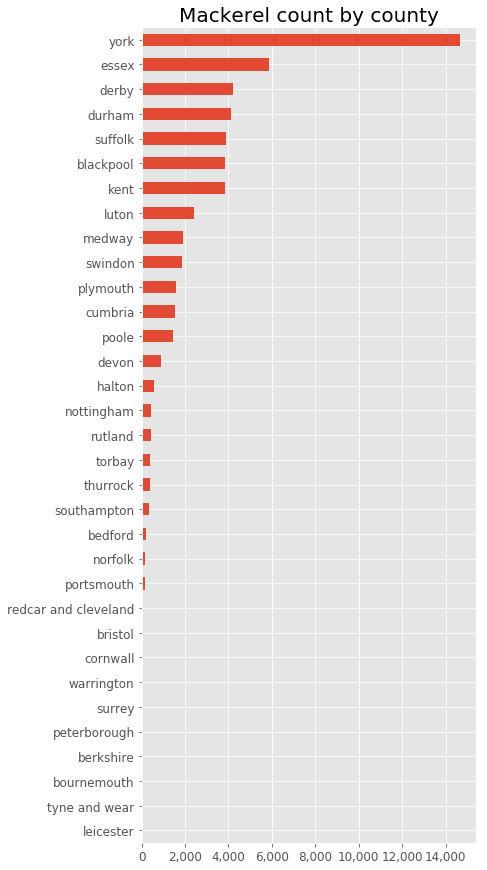

In [107]:
mackerel_counts_county.sort_values(by='count', inplace=True)
mackerel_counts_county_nonzero = mackerel_counts_county[mackerel_counts_county['count'] > 0]
fig, ax = plt.subplots(1, 1, figsize=(6, 15))
mackerel_counts_county_nonzero.plot.barh(fontsize=12, ax=ax)
ax.set_title('Mackerel count by county', fontsize=20)
ax.legend().set_visible(False)
ax.xaxis.set_major_formatter(thou_fmt)